Creating Discrete Cosine Transform showcase for correlated state compression

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import numpy as np
from scipy.fftpack import dct, idct

Our state space is between [0-bounds) and we have (dimX * dimY) values

In [11]:
# feel free to play with these values
dimX = 33
dimY = 33

# data bounds
bounds = 10

state = 100 * np.random.random((dimX,dimY))          

Now we compress these values into (dimX * dimY) / comp_factor DCT coefficents and use Inverse DCT to transform it back to the previous dimensionality

In [14]:
# how much compression factor 1 : ?
comp_factor = 55

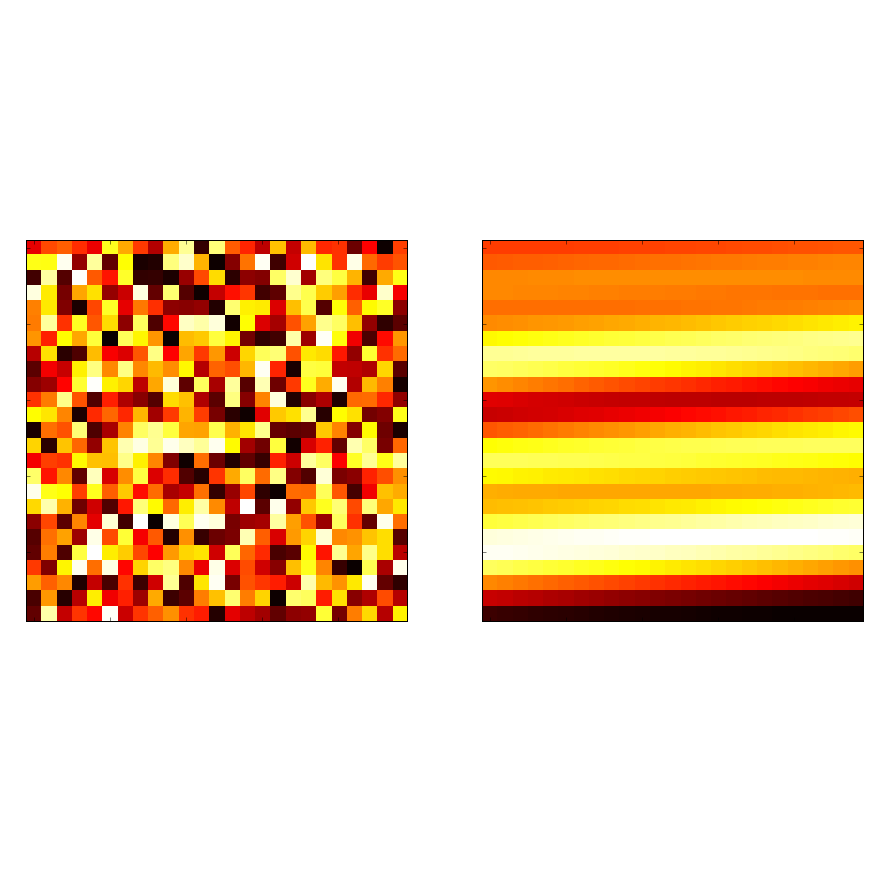

In [33]:


# transform the data into DCT coefficients
coeff_state = dct(state.flatten())

# compress with the comp_factor
coeff_len = int((dimX * dimY) / comp_factor)
compressed_coeff_state = coeff_state[0:coeff_len]

# transform back into data
compressed_state = idct(compressed_coeff_state, n = (dimX * dimY))
compressed_state = compressed_state.reshape(dimX, dimY)

# create a grid to show the plots
fig = plt.figure(figsize=(15,15))
# update ticks

plt.axis('off')
grid = AxesGrid(fig, 111,
                nrows_ncols=(1, 2),
                axes_pad=1.05,
                share_all=True,
                label_mode="all",
                )

grid[0].imshow(state, cmap='hot', interpolation='nearest')
grid[0].set_xticklabels([])
grid[0].set_yticklabels([])


grid[1].imshow(compressed_state, cmap='hot', interpolation='nearest')
grid[1].set_xticklabels([])
grid[1].set_yticklabels([])


ind_array = np.arange(0, dimY, 1.0)
x, y = np.meshgrid(ind_array, ind_array)

#for (i,j,val) in zip(x.flatten(), y.flatten(), state.flatten()):
#    grid[2].text(i, j, int(val), va='center', ha='center')

#for (i,j,val) in zip(x.flatten(), y.flatten(), compressed_state.flatten()):
#    grid[3].text(i, j, int(val) / 1802 , va='center', ha='center')
   
plt.show()

`This is the initial data                                This is the reconstruction`